# Reversible binding

In [1]:
import random
random.seed(0)

We can initialize a system of a simple reversible binding interaction as follows:

In [2]:
from pykappa.system import System

system = System.from_kappa(
    mixture={"A(x[.])": 100, "B(x[.])": 100},
    rules=[
        "A(x[.]), B(x[.]) -> A(x[1]), B(x[1]) @ 1",
        "A(x[1]), B(x[1]) -> A(x[.]), B(x[.]) @ 1",
    ],
    observables={"AB": "|A(x[1]), B(x[1])|"},
)

or equivalently from a .ka-style string:

In [3]:
system = System.from_ka(
    """
    %init: 100 A(x[.])
    %init: 100 B(x[.])

    %obs: 'AB' |A(x[1]), B(x[1])|

    A(x[.]), B(x[.]) <-> A(x[1]), B(x[1]) @ 1, 1
    """
)

100 instances of molecules of type `A` and of type `B`, each with an empty binding domain `x`, are created, and we track the number of `AB` complexes.

We're going to simulate this system and plot its behavior, marking certain times of interest. We'll first simulate until time 1:

In [4]:
times = []
while system.time < 1:
    system.update()
times.append(system.time)

We'll now manually instantiate 50 new `A` and `B` molecules each, start tracking the number of free `A`, and simulate until there are no more than 10 free `A` in the mixture:

In [5]:
system.mixture.instantiate("A(x[.]), B(x[.])", 50)

system["A"] = "|A(x[.])|"
while system["A"] > 10:
    system.update()
times.append(system.time)

Now let's simulate some more time:

In [6]:
while system.time < 2:
    system.update()
times.append(2)

The default simulator provides the most features since it’s written directly in Python, but models can be offloaded to [KaSim](https://github.com/Kappa-Dev/KappaTools), a compiled Kappa simulator, for faster simulation. For example, we could've run:
```python
system.update_via_kasim(time=1)
```

Finally, let’s plot the history of the quantities we tracked:

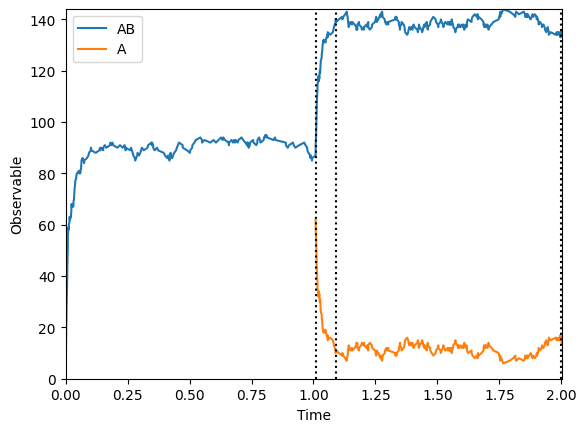

In [7]:
import matplotlib.pyplot as plt

system.monitor.plot(combined=True)
for time in times:
    plt.axvline(time, color="black", linestyle="dotted")
plt.show()

The system equilibrates relatively early.
Then new `A` is added and the number of `AB` complexes increases, reaching a higher equilibrium concentration.